In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('results.csv')

df.head(10)

,Model Type,Training Split Ratio,Max Depth,Criterion,Number of Trees,Mean Accuracy
0,Decision Tree,0.35,6,gini,NaN,0.996129
1,Decision Tree,0.45,6,gini,NaN,0.995823
2,Decision Tree,0.20,6,gini,NaN,0.995772
3,Decision Tree,0.25,6,gini,NaN,0.995716
4,Decision Tree,0.15,6,gini,NaN,0.995439
5,Decision Tree,0.10,6,gini,NaN,0.995375
6,Decision Tree,0.30,6,gini,NaN,0.995221
7,Decision Tree,0.40,6,gini,NaN,0.995200
8,Random Forest,0.25,6,gini,126.0,0.994426
9,Random Forest,0.20,6,gini,125.0,0.994425


It appears that the most accurate model (out of RF and DT) to predict mushroom toxicity is decision tree with a max depth of 6, and when using the gini index. However, it is important to note that the accuracies for ALL models are fairly acceptable (most above 99% accurate)

Text(0.5, 0, 'Max Depth of Tree')

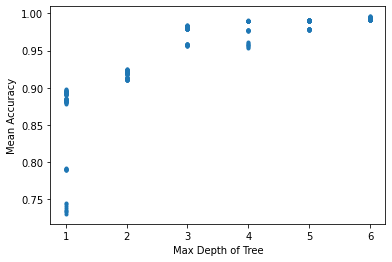

In [10]:
plt.plot(df['Max Depth'],df['Mean Accuracy'],'.')
plt.ylabel('Mean Accuracy')
plt.xlabel('Max Depth of Tree')

When comparing the max depths of the trees, we see a logarithmic growth that diminishes after 6 max depth. When testing, I found that max depth of 7 often led to over-fitting.

Text(0.5, 0, 'Training Split Ratio')

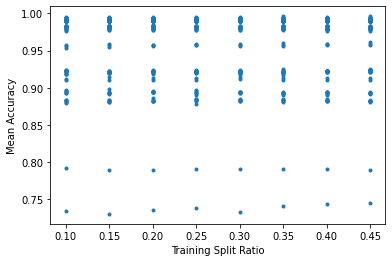

In [9]:
plt.plot(df['Training Split Ratio'],df['Mean Accuracy'],'.')
plt.ylabel('Mean Accuracy')
plt.xlabel('Training Split Ratio')

When looking at a chart of the different training-test split ratios, we can see that it doesnt make too much of a significant difference - but there is data clumped at certain levels for each ratio. I am guessing that has to do with different max-depths of trees. Lets check that:

In [6]:
avg_accuracy_depth = pd.DataFrame(df.groupby(['Training Split Ratio', 'Max Depth'])['Mean Accuracy'].mean().reset_index())

avg_accuracy_depth.head(8)

,Training Split Ratio,Max Depth,Mean Accuracy
0,0.10,1,0.870229
1,0.10,2,0.920252
2,0.10,3,0.978264
3,0.10,4,0.986316
4,0.10,5,0.988622
5,0.10,6,0.992926
6,0.15,1,0.869862
7,0.15,2,0.919691


Text(0, 0.5, 'Mean Accuracy')

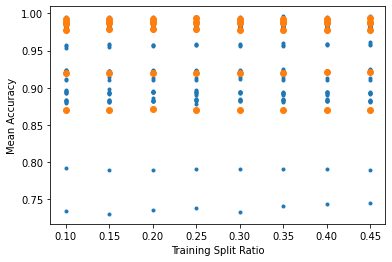

In [7]:
plt.plot(df['Training Split Ratio'],df['Mean Accuracy'],'.')
plt.plot(avg_accuracy_depth['Training Split Ratio'],avg_accuracy_depth['Mean Accuracy'],'o')
plt.xlabel('Training Split Ratio')
plt.ylabel('Mean Accuracy')

This accounts for a lot of the skewed data above 85% accuracy, but there is still some mystery of what's going on below 80%. Lets look at the raw data to see if we can find out whats going on.

In [8]:
temp = df[df['Mean Accuracy'] < 0.85]

temp.head(50)

,Model Type,Training Split Ratio,Max Depth,Criterion,Number of Trees,Mean Accuracy
656,Decision Tree,0.10,1,gini,NaN,0.791833
657,Decision Tree,0.35,1,gini,NaN,0.790974
658,Decision Tree,0.30,1,gini,NaN,0.790636
659,Decision Tree,0.40,1,gini,NaN,0.790151
660,Decision Tree,0.25,1,gini,NaN,0.790138
661,Decision Tree,0.20,1,gini,NaN,0.789858
662,Decision Tree,0.15,1,gini,NaN,0.789779
663,Decision Tree,0.45,1,gini,NaN,0.789680
664,Decision Tree,0.45,1,entropy,NaN,0.745460
665,Decision Tree,0.40,1,entropy,NaN,0.743215


It looks like the main cause is most likely the max-depth still, and that the seperator from the group below 80% and the group below 75% is gini criterion VS entropy criterion

## Conclusion

It is interesting that the model with the highest level of accuracy is a gini index decision tree with a max depth of 6, which outperforms a random forest with the same criteria. These results are slim, but it is significant nonetheless. 

For future research, it would be interesting to compare these results to a similar process for other models, such as a neural network or naive bayes, and see which is more accurate.